# <center><font color='magenta'>**Python for DA1**</font></center>
### <center>Central European University, 2024-2025</center>
# <center>Class 6</center>

## Data Analysis using Pandas

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Match-level Data By Reading A CSV File

In [6]:
df_matches = pd.read_csv('E0.csv')

<br>**What do we have?**   
Let's interpret the columns! 

In [8]:
df_matches.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,13/08/2021,20:00,Brentford,Arsenal,2,0,H,1,0,...,1.62,0.50,1.75,2.05,1.81,2.13,2.05,2.17,1.80,2.09
1,E0,14/08/2021,12:30,Man United,Leeds,5,1,H,1,0,...,2.25,-1.00,2.05,1.75,2.17,1.77,2.19,1.93,2.10,1.79
2,E0,14/08/2021,15:00,Burnley,Brighton,1,2,A,1,0,...,1.62,0.25,1.79,2.15,1.81,2.14,1.82,2.19,1.79,2.12
3,E0,14/08/2021,15:00,Chelsea,Crystal Palace,3,0,H,2,0,...,1.94,-1.50,2.05,1.75,2.12,1.81,2.16,1.93,2.06,1.82
4,E0,14/08/2021,15:00,Everton,Southampton,3,1,H,0,1,...,1.67,-0.50,2.05,1.88,2.05,1.88,2.08,1.90,2.03,1.86


In [10]:
df_matches.shape

(380, 106)

Too many columns to list detailed info. 

In [12]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Columns: 106 entries, Div to AvgCAHA
dtypes: float64(82), int64(16), object(8)
memory usage: 314.8+ KB


In [14]:
df_matches[df_matches.HomeTeam == 'Arsenal'].head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
18,E0,22/08/2021,16:30,Arsenal,Chelsea,0,2,A,0,2,...,1.74,0.50,2.02,1.91,2.00,1.93,2.07,1.93,2.02,1.87
31,E0,11/09/2021,15:00,Arsenal,Norwich,1,0,H,0,0,...,2.33,-1.50,2.10,1.70,2.19,1.76,2.31,1.94,2.15,1.75
58,E0,26/09/2021,16:30,Arsenal,Tottenham,3,1,H,3,0,...,1.90,-0.25,1.95,1.98,1.93,2.00,2.06,2.06,1.91,1.98
79,E0,18/10/2021,20:00,Arsenal,Crystal Palace,2,2,D,1,0,...,1.92,-1.00,2.00,1.80,2.14,1.81,2.16,1.96,2.09,1.80
80,E0,22/10/2021,20:00,Arsenal,Aston Villa,3,1,H,2,0,...,2.03,-0.50,2.03,1.90,2.04,1.89,2.11,1.96,1.99,1.88


In [16]:
df_matches[df_matches.HomeTeam == 'Aston Villa'].shape

(19, 106)

In [18]:
df_matches[df_matches.AwayTeam == 'Aston Villa'].shape

(19, 106)

In [31]:
for col in df_matches.columns:
    print(col)

Div
Date
Time
HomeTeam
AwayTeam
FTHG
FTAG
FTR
HTHG
HTAG
HTR
Referee
HS
AS
HST
AST
HF
AF
HC
AC
HY
AY
HR
AR
B365H
B365D
B365A
BWH
BWD
BWA
IWH
IWD
IWA
PSH
PSD
PSA
WHH
WHD
WHA
VCH
VCD
VCA
MaxH
MaxD
MaxA
AvgH
AvgD
AvgA
B365>2.5
B365<2.5
P>2.5
P<2.5
Max>2.5
Max<2.5
Avg>2.5
Avg<2.5
AHh
B365AHH
B365AHA
PAHH
PAHA
MaxAHH
MaxAHA
AvgAHH
AvgAHA
B365CH
B365CD
B365CA
BWCH
BWCD
BWCA
IWCH
IWCD
IWCA
PSCH
PSCD
PSCA
WHCH
WHCD
WHCA
VCCH
VCCD
VCCA
MaxCH
MaxCD
MaxCA
AvgCH
AvgCD
AvgCA
B365C>2.5
B365C<2.5
PC>2.5
PC<2.5
MaxC>2.5
MaxC<2.5
AvgC>2.5
AvgC<2.5
AHCh
B365CAHH
B365CAHA
PCAHH
PCAHA
MaxCAHH
MaxCAHA
AvgCAHH
AvgCAHA


**Limiting The Dataset**

In [20]:
df_matches = df_matches[
    ['Date', 'HomeTeam', 'AwayTeam', 
     'FTHG', 'FTAG', 'HS', 'AS', 
     'B365H', 'B365A']
]
# FTHG: full-time home goals
# FTAG: full-time away goals
# HS and AS: home shots, away shots
# B365H and B365A - betting site odds for home and away team wins

In [22]:
df_matches.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,B365H,B365A
0,13/08/2021,Brentford,Arsenal,2,0,8,22,4.00,1.95
1,14/08/2021,Man United,Leeds,5,1,16,10,1.53,5.75
2,14/08/2021,Burnley,Brighton,1,2,14,14,3.10,2.45
3,14/08/2021,Chelsea,Crystal Palace,3,0,13,4,1.25,13.00
4,14/08/2021,Everton,Southampton,3,1,14,6,1.90,4.00


In [24]:
df_matches.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,B365H,B365A
375,22/05/2022,Crystal Palace,Man United,1,0,6,10,3.00,2.25
376,22/05/2022,Leicester,Southampton,4,1,12,7,1.85,3.80
377,22/05/2022,Liverpool,Wolves,3,1,29,7,1.14,15.00
378,22/05/2022,Man City,Aston Villa,3,2,24,4,1.16,17.00
379,22/05/2022,Norwich,Tottenham,0,5,9,19,9.50,1.25


In [26]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      380 non-null    object 
 1   HomeTeam  380 non-null    object 
 2   AwayTeam  380 non-null    object 
 3   FTHG      380 non-null    int64  
 4   FTAG      380 non-null    int64  
 5   HS        380 non-null    int64  
 6   AS        380 non-null    int64  
 7   B365H     380 non-null    float64
 8   B365A     380 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 26.8+ KB


In [28]:
df_matches.Date.iloc[0]

'13/08/2021'

In [30]:
df_matches.Date.iloc[300]

'09/04/2022'

<br>Date is a `string` which we may be better of with as a date-like object.

In [32]:
pd.to_datetime(df_matches.Date.iloc[300]) #default is MMDDYYYY

Timestamp('2022-09-04 00:00:00')

In [34]:
pd.to_datetime(df_matches.Date.iloc[300], format = '%d/%m/%Y') #we have to provide the exact formatting

Timestamp('2022-04-09 00:00:00')

In [36]:
# How do we need to use the pd.to_datetime function ot make sure date strings are parsed properly? 

df_matches.Date = pd.to_datetime(df_matches.Date, format = '%d/%m/%Y')

In [38]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      380 non-null    datetime64[ns]
 1   HomeTeam  380 non-null    object        
 2   AwayTeam  380 non-null    object        
 3   FTHG      380 non-null    int64         
 4   FTAG      380 non-null    int64         
 5   HS        380 non-null    int64         
 6   AS        380 non-null    int64         
 7   B365H     380 non-null    float64       
 8   B365A     380 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 26.8+ KB


In [40]:
df_matches.Date.iloc[300]

Timestamp('2022-04-09 00:00:00')

<br>

### Match Stats Analysis

In [42]:
df_matches.describe()

,Date,FTHG,FTAG,HS,AS,B365H,B365A
count,380,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2022-01-08 18:45:28.421052928,1.513158,1.305263,13.847368,11.736842,3.041026,4.690079
min,2021-08-13 00:00:00,0.000000,0.000000,3.000000,1.000000,1.080000,1.140000
25%,2021-10-30 00:00:00,1.000000,0.000000,9.000000,8.000000,1.610000,2.237500
50%,2022-01-02 12:00:00,1.000000,1.000000,13.500000,11.000000,2.275000,3.250000
75%,2022-03-18 06:00:00,2.000000,2.000000,17.000000,15.000000,3.300000,5.500000
max,2022-05-22 00:00:00,7.000000,6.000000,31.000000,31.000000,19.000000,26.000000
std,NaN,1.326545,1.258836,5.661784,5.348460,2.380071,4.230893


In [44]:
df_matches.describe().transpose().iloc[1:,:] #no need for description on dates

,count,mean,min,25%,50%,75%,max,std
FTHG,380.0,1.513158,0.0,1.0,1.0,2.0,7.0,1.326545
FTAG,380.0,1.305263,0.0,0.0,1.0,2.0,6.0,1.258836
HS,380.0,13.847368,3.0,9.0,13.5,17.0,31.0,5.661784
AS,380.0,11.736842,1.0,8.0,11.0,15.0,31.0,5.34846
B365H,380.0,3.041026,1.08,1.61,2.275,3.3,19.0,2.380071
B365A,380.0,4.690079,1.14,2.2375,3.25,5.5,26.0,4.230893


Interesting fact: which team shot 6 goals on an away match?

In [46]:
df_matches[df_matches.FTAG == 6]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,B365H,B365A
302,2022-04-09,Southampton,Chelsea,0,6,4,24,3.8,1.95


In [48]:
df_matches[df_matches.FTHG == 7]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,B365H,B365A
81,2021-10-23,Chelsea,Norwich,7,0,23,3,1.18,15.0
159,2021-12-14,Man City,Leeds,7,0,31,6,1.14,15.0


<br>

**Soccer Is About Goals. Let's See The Goals!**

_Home goals_ can be directly read from the table.

<br>
<font color = '#646464'><b><i>How To Draw Charts From Pandas?</i></b></font>
<br>
<br>
There are two ways: 

- using the `plot()` method as described [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html),
- calling the chart type, for instance `hist()` [directly](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html).

Pandas `plot()` methods offer a variety of customization options, the most of which can be found in the [matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html). 

This is the basic chart output from Pandas `plot()` method.


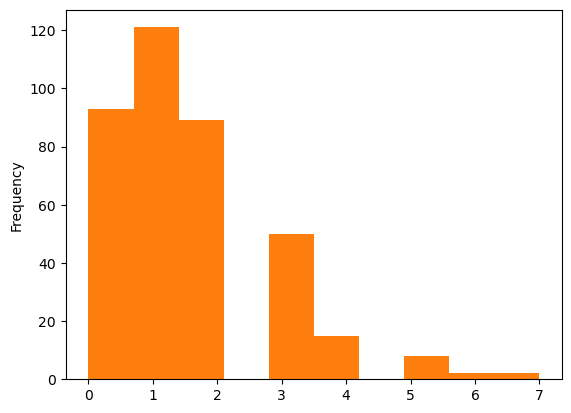

In [56]:
df_matches.FTHG.plot(
    kind = 'hist'
)
plt.show()

<br>We can add some customization to the plot for better aesthetics:
- figure size
- number of bins
- column alignment
- gap between columns
- chart title

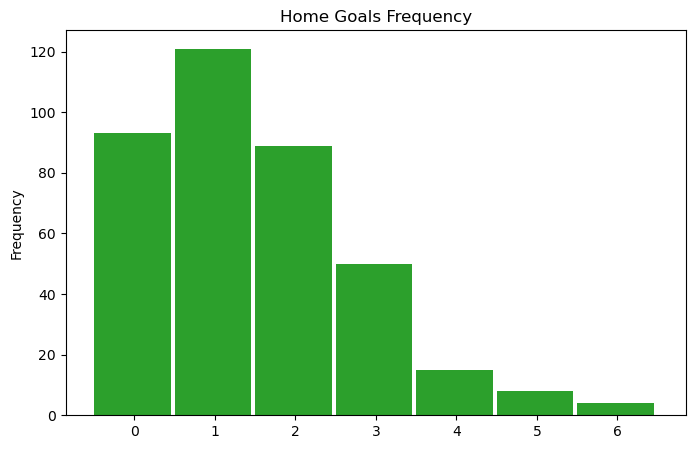

In [68]:
df_matches.FTHG.plot(
    kind = 'hist', bins = 7, 
    align = 'left', width = 0.95, figsize = (8,5),
    title = 'Home Goals Frequency',
)
plt.show()

_Away goals_ also

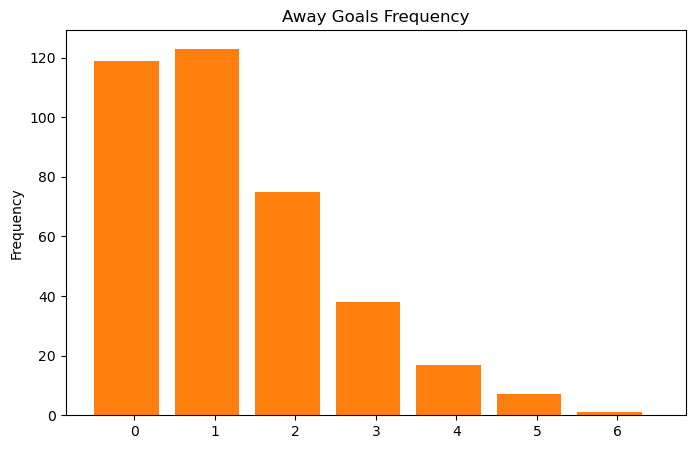

In [62]:
df_matches.FTAG.plot(
    kind = 'hist', bins = [0,1,2,3,4,5,6,7], # define either number of bins (as an integer) or the bins themselves (as a list)
    align = 'left', width = 0.8, figsize = (8,5),
    title = 'Away Goals Frequency',
)
plt.show()

<br>Let's create _total goals_ as _TG_!

In [72]:
# create 'TG' (total goals) column as a sum of goals by the home team and goals by the away team.
df_matches['TG'] = df_matches.FTHG + df_matches.FTAG

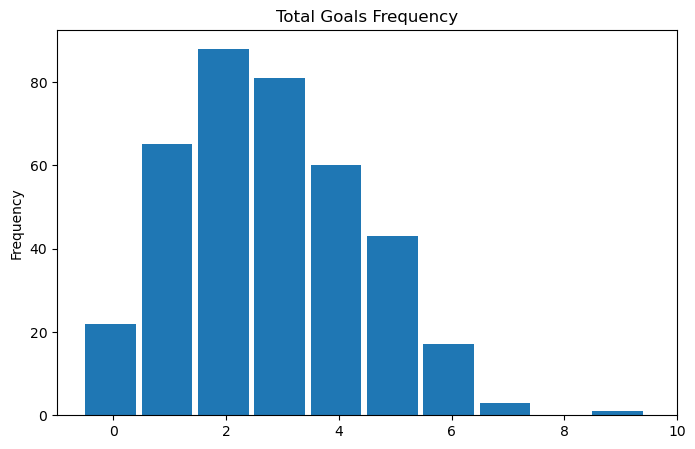

In [74]:
df_matches.TG.plot(
    kind = 'hist', bins = list(range(0,11)), # list of bin categories
    align = 'left', width = 0.9, figsize = (8,5),
    title = 'Total Goals Frequency'
)
plt.show()

<br>Problem: x-axis value display is incomplete by default. We need to overwrite the default option using the `xticks = ` option, which accepts a `list` of ticks. 

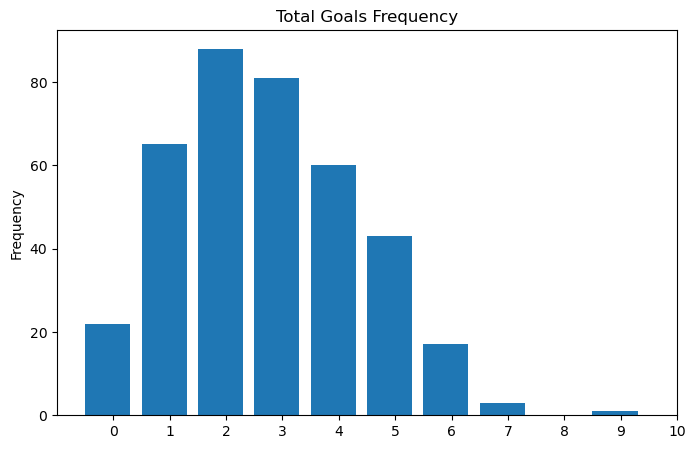

In [76]:
df_matches.TG.plot(
    kind = 'hist', bins = [x for x in range(0,11)], # list of bin categories with list comprehension
    align = 'left', width = 0.8, figsize = (8,5),
    title = 'Total Goals Frequency',
    xticks = [x for x in range(0,11)]
)
plt.show()

In [78]:
df_matches.TG.value_counts()

TG
2    88
3    81
1    65
4    60
5    43
0    22
6    17
7     3
9     1
Name: count, dtype: int64

In [80]:
type(df_matches.TG.value_counts())

pandas.core.series.Series

In [82]:
df_matches.TG.value_counts().sort_index()

TG
0    22
1    65
2    88
3    81
4    60
5    43
6    17
7     3
9     1
Name: count, dtype: int64

In [84]:
df_matches[df_matches.TG == 9]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,B365H,B365A,TG
169,2021-12-26,Man City,Leicester,6,3,17,14,1.18,13.0,9


**Which teams are the top scorers?**

Answer:
- sum up goals
- grouped by team

Problem:
- there is _Home Team_ and _Away Team_

Solution:
- separate table for _home_ and _away_
- for potential later use we define both `mean` and `median`

<br>

Simple aggregation for one metric: mean. We are using `groupby()`. 

In [86]:
df_matches.groupby('HomeTeam')['FTHG'].mean()

HomeTeam
Arsenal           1.842105
Aston Villa       1.526316
Brentford         1.157895
Brighton          1.000000
Burnley           0.947368
Chelsea           1.947368
Crystal Palace    1.421053
Everton           1.421053
Leeds             1.000000
Leicester         1.789474
Liverpool         2.578947
Man City          3.052632
Man United        1.684211
Newcastle         1.368421
Norwich           0.631579
Southampton       1.210526
Tottenham         2.000000
Watford           0.894737
West Ham          1.736842
Wolves            1.052632
Name: FTHG, dtype: float64

In [88]:
pd.DataFrame(df_matches.groupby('HomeTeam')['FTHG'].mean())

,FTHG
HomeTeam,
Arsenal,1.842105
Aston Villa,1.526316
Brentford,1.157895
Brighton,1.000000
Burnley,0.947368
Chelsea,1.947368
Crystal Palace,1.421053
Everton,1.421053
Leeds,1.000000


Aggregation for multiple metrics: mean and median.

In [90]:
df_goal_stats = df_matches.groupby('HomeTeam').agg(
    {'FTHG': [np.mean, np.median],
    'FTAG': [np.mean, np.median]}
)

How can we interpret this table?

In [92]:
df_goal_stats

FTHG             FTAG       
                    mean median      mean median
HomeTeam                                        
Arsenal         1.842105    2.0  0.894737    1.0
Aston Villa     1.526316    1.0  1.526316    1.0
Brentford       1.157895    1.0  1.105263    1.0
Brighton        1.000000    1.0  1.210526    1.0
Burnley         0.947368    1.0  1.315789    1.0
Chelsea         1.947368    2.0  1.157895    1.0
Crystal Palace  1.421053    1.0  0.894737    1.0
Everton         1.421053    1.0  1.315789    1.0
Leeds           1.000000    1.0  2.000000    2.0
Leicester       1.789474    2.0  1.210526    1.0
Liverpool       2.578947    2.0  0.473684    0.0
Man City        3.052632    3.0  0.789474    0.0
Man United      1.684211    1.0  1.157895    1.0
Newcastle       1.368421    1.0  1.421053    1.0
Norwich         0.631579    0.0  2.263158    2.0
Southampton     1.210526    1.0  1.263158    1.0
Tottenham       2.000000    2.0  1.000000    1.0
Watford         0.894737    1.0  2.421053    2.0
West Ham        1.736842    2.0  1.368421    1.0
Wolves          1.052632    1.0  1.315789    1.0

What is this weird table structure? These are [*multilevel columns*](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#hierarchical-indexing-multiindex). We won't cover the delicacies here, but it is a lot of fun &#128518;.

In [94]:
df_goal_stats.columns

MultiIndex([('FTHG',   'mean'),
            ('FTHG', 'median'),
            ('FTAG',   'mean'),
            ('FTAG', 'median')],
           )

In [96]:
for col in df_goal_stats.columns:
    print(col)

('FTHG', 'mean')
('FTHG', 'median')
('FTAG', 'mean')
('FTAG', 'median')


<br>**Which teams are the top scorers at home?**

In [98]:
# Columns in a multi-level structure are selected as a tuple
df_goal_stats.sort_values(by = ('FTHG','mean'), ascending = False) # Default is 'ascending' so we have to add 'False' as input parameter to put the top scorers first.

FTHG             FTAG       
                    mean median      mean median
HomeTeam                                        
Man City        3.052632    3.0  0.789474    0.0
Liverpool       2.578947    2.0  0.473684    0.0
Tottenham       2.000000    2.0  1.000000    1.0
Chelsea         1.947368    2.0  1.157895    1.0
Arsenal         1.842105    2.0  0.894737    1.0
Leicester       1.789474    2.0  1.210526    1.0
West Ham        1.736842    2.0  1.368421    1.0
Man United      1.684211    1.0  1.157895    1.0
Aston Villa     1.526316    1.0  1.526316    1.0
Crystal Palace  1.421053    1.0  0.894737    1.0
Everton         1.421053    1.0  1.315789    1.0
Newcastle       1.368421    1.0  1.421053    1.0
Southampton     1.210526    1.0  1.263158    1.0
Brentford       1.157895    1.0  1.105263    1.0
Wolves          1.052632    1.0  1.315789    1.0
Leeds           1.000000    1.0  2.000000    2.0
Brighton        1.000000    1.0  1.210526    1.0
Burnley         0.947368    1.0  1.315789    1.0
Watford         0.894737    1.0  2.421053    2.0
Norwich         0.631579    0.0  2.263158    2.0

<br>**Which teams got the least goals (has the best defense) at home?**

In [100]:
df_goal_stats.sort_values(by = ('FTAG','mean'), ascending = True)

FTHG             FTAG       
                    mean median      mean median
HomeTeam                                        
Liverpool       2.578947    2.0  0.473684    0.0
Man City        3.052632    3.0  0.789474    0.0
Arsenal         1.842105    2.0  0.894737    1.0
Crystal Palace  1.421053    1.0  0.894737    1.0
Tottenham       2.000000    2.0  1.000000    1.0
Brentford       1.157895    1.0  1.105263    1.0
Man United      1.684211    1.0  1.157895    1.0
Chelsea         1.947368    2.0  1.157895    1.0
Leicester       1.789474    2.0  1.210526    1.0
Brighton        1.000000    1.0  1.210526    1.0
Southampton     1.210526    1.0  1.263158    1.0
Everton         1.421053    1.0  1.315789    1.0
Burnley         0.947368    1.0  1.315789    1.0
Wolves          1.052632    1.0  1.315789    1.0
West Ham        1.736842    2.0  1.368421    1.0
Newcastle       1.368421    1.0  1.421053    1.0
Aston Villa     1.526316    1.0  1.526316    1.0
Leeds           1.000000    1.0  2.000000    2.0
Norwich         0.631579    0.0  2.263158    2.0
Watford         0.894737    1.0  2.421053    2.0

<br>**Which teams are the top scorers away?**

In [102]:
df_goal_stats_away = df_matches.groupby('AwayTeam').agg(
    {'FTHG': [np.mean, np.median],
    'FTAG': [np.mean, np.median]}
)

In [104]:
df_goal_stats_away.sort_values(by = ('FTAG','mean'), ascending = False)

FTHG             FTAG       
                    mean median      mean median
AwayTeam                                        
Liverpool       0.894737    1.0  2.368421    2.0
Man City        0.578947    0.0  2.157895    2.0
Chelsea         0.578947    0.0  2.052632    2.0
Tottenham       1.105263    1.0  1.631579    1.0
Leicester       1.894737    2.0  1.473684    1.0
West Ham        1.315789    1.0  1.421053    1.0
Arsenal         1.631579    2.0  1.368421    1.0
Brentford       1.842105    2.0  1.368421    1.0
Man United      1.842105    1.0  1.315789    1.0
Leeds           2.157895    2.0  1.210526    1.0
Crystal Palace  1.526316    1.0  1.210526    1.0
Aston Villa     1.315789    1.0  1.210526    1.0
Brighton        1.105263    1.0  1.210526    1.0
Southampton     2.263158    2.0  1.052632    1.0
Newcastle       1.842105    1.0  0.947368    1.0
Wolves          0.947368    1.0  0.947368    1.0
Watford         1.631579    1.0  0.894737    0.0
Everton         2.157895    2.0  0.842105    1.0
Burnley         1.473684    1.0  0.842105    1.0
Norwich         2.157895    2.0  0.578947    0.0

<br>**Which teams aget the fewst goals from the home team why they are playing away?**

In [106]:
df_goal_stats_away.sort_values(by = ('FTHG','mean'), ascending = True)

FTHG             FTAG       
                    mean median      mean median
AwayTeam                                        
Chelsea         0.578947    0.0  2.052632    2.0
Man City        0.578947    0.0  2.157895    2.0
Liverpool       0.894737    1.0  2.368421    2.0
Wolves          0.947368    1.0  0.947368    1.0
Brighton        1.105263    1.0  1.210526    1.0
Tottenham       1.105263    1.0  1.631579    1.0
Aston Villa     1.315789    1.0  1.210526    1.0
West Ham        1.315789    1.0  1.421053    1.0
Burnley         1.473684    1.0  0.842105    1.0
Crystal Palace  1.526316    1.0  1.210526    1.0
Watford         1.631579    1.0  0.894737    0.0
Arsenal         1.631579    2.0  1.368421    1.0
Man United      1.842105    1.0  1.315789    1.0
Newcastle       1.842105    1.0  0.947368    1.0
Brentford       1.842105    2.0  1.368421    1.0
Leicester       1.894737    2.0  1.473684    1.0
Norwich         2.157895    2.0  0.578947    0.0
Everton         2.157895    2.0  0.842105    1.0
Leeds           2.157895    2.0  1.210526    1.0
Southampton     2.263158    2.0  1.052632    1.0

**Most agressive teams home and away**

We assume that agressive teams make many attempts to shoot, so _home shots_ (HO) and _away shots_ (AO) is a measure of ambitious tactic. 

In [108]:
# Average shots at home per team.
df_shot_stats_home = df_matches.groupby('HomeTeam').agg(
    {'HS': [np.mean, np.median],
    'AS': [np.mean, np.median]}
)

In [110]:
# Average shots away by team.
df_shot_stats_away = df_matches.groupby('AwayTeam').agg(
    {'HS': [np.mean, np.median],
    'AS': [np.mean, np.median]}
)

Most aggressive at home

In [112]:
df_shot_stats_home.sort_values(by = ('HS','mean'), ascending = False)

HS                AS       
                     mean median       mean median
HomeTeam                                          
Liverpool       21.263158   22.0   7.000000    6.0
Man City        19.000000   18.0   5.421053    5.0
Arsenal         18.263158   20.0   9.368421    9.0
Chelsea         17.157895   19.0   9.105263    7.0
Brighton        14.736842   14.0  12.000000   11.0
Man United      14.684211   14.0  12.526316   12.0
Leeds           13.894737   15.0  14.421053   15.0
Tottenham       13.684211   14.0  11.315789   10.0
Newcastle       12.578947   12.0  13.947368   13.0
Leicester       12.473684   12.0  14.421053   14.0
Southampton     12.421053   12.0  13.315789   14.0
Aston Villa     12.368421   12.0  11.842105   11.0
Brentford       12.263158   13.0  11.578947   10.0
West Ham        12.210526   13.0  12.842105   13.0
Crystal Palace  12.157895   11.0   9.789474   10.0
Burnley         12.052632   13.0  13.684211   12.0
Everton         11.947368   12.0  12.263158   12.0
Wolves          11.736842   11.0  11.842105   12.0
Watford         11.368421   13.0  14.000000   13.0
Norwich         10.684211   11.0  14.052632   13.0

Most agressive away. 

In [114]:
df_shot_stats_away.sort_values(by = ('AS','mean'), ascending = False)

HS                AS       
                     mean median       mean median
AwayTeam                                          
Man City         7.052632    7.0  18.631579   18.0
Liverpool        8.578947    8.0  17.157895   17.0
Chelsea          8.842105    8.0  14.000000   15.0
Southampton     12.842105   12.0  12.947368   12.0
Arsenal         13.000000   13.0  12.684211   12.0
Tottenham       14.000000   14.0  12.157895   10.0
Man United      14.368421   14.0  12.052632   13.0
Leeds           16.210526   16.0  11.631579   12.0
Aston Villa     13.263158   12.0  11.526316   11.0
Everton         15.210526   15.0  11.105263   12.0
Brighton        13.052632   14.0  11.052632   11.0
Newcastle       13.421053   13.0  11.000000    9.0
Brentford       14.842105   15.0  11.000000   10.0
West Ham        16.000000   15.0  10.578947    8.0
Leicester       14.947368   14.0  10.421053   10.0
Crystal Palace  13.526316   13.0   9.526316    9.0
Watford         15.526316   15.0   9.473684    9.0
Wolves          15.052632   14.0   9.421053    8.0
Burnley         18.052632   18.0   9.368421    9.0
Norwich         19.157895   19.0   9.000000    9.0

Let's have a look at Manchester City! 

In [116]:
df_matches[df_matches.AwayTeam == 'Man City']

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,B365H,B365A,TG
9,2021-08-15,Tottenham,Man City,1,0,13,18,5.50,1.60,1
33,2021-09-11,Leicester,Man City,0,1,6,25,6.00,1.57,1
50,2021-09-25,Chelsea,Man City,0,1,5,15,2.62,2.75,1
69,2021-10-03,Liverpool,Man City,2,2,6,12,2.87,2.40,4
86,2021-10-23,Brighton,Man City,1,4,10,23,8.00,1.40,5
101,2021-11-06,Man United,Man City,0,2,5,16,4.75,1.70,2
135,2021-12-01,Aston Villa,Man City,1,2,9,17,9.00,1.33,3
143,2021-12-04,Watford,Man City,1,3,11,26,12.00,1.20,4
166,2021-12-19,Newcastle,Man City,0,4,5,18,13.00,1.18,4
181,2021-12-29,Brentford,Man City,0,1,6,12,19.00,1.14,1


<br>***What is the typical home and away shot number per match? Do teams play more on the defensive when playing away?***

Home

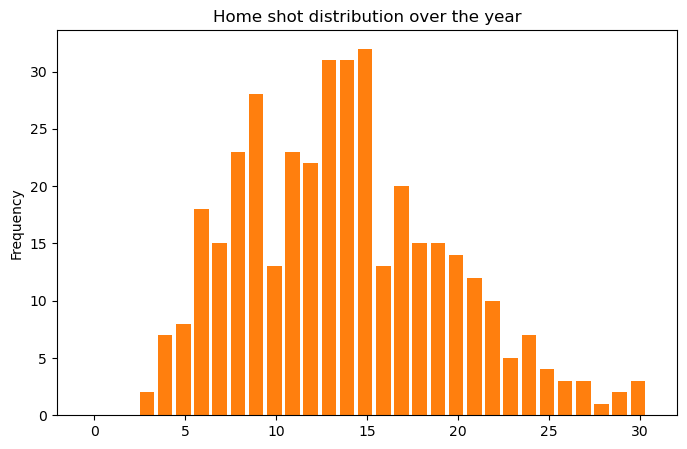

In [120]:
df_matches['HS'].plot(
    kind = 'hist',  bins = [x for x in range(0,32)], # bins from 0 to 31
    figsize = (8,5), width = 0.8, align = 'left',
    title = 'Home shot distribution over the year'
)
plt.show()

Same graph but with a slightly different syntax and look.

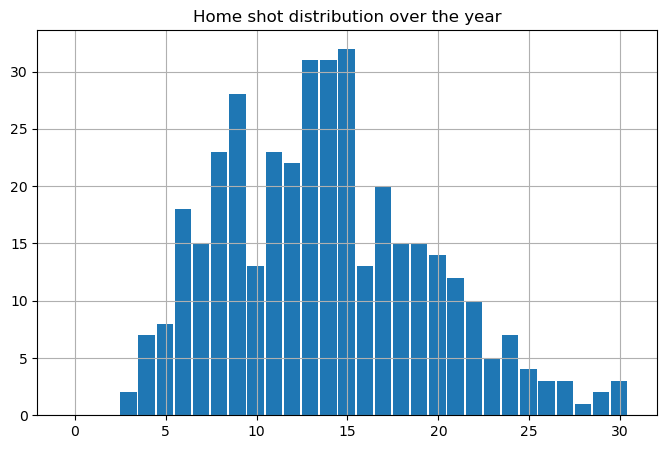

In [122]:
df_matches['HS'].hist(
    bins = list(range(0,32)), # bins from 0 to 31
    figsize = (8,5), width = 0.9, align = 'left'
)
plt.title('Home shot distribution over the year')
plt.show()

Away

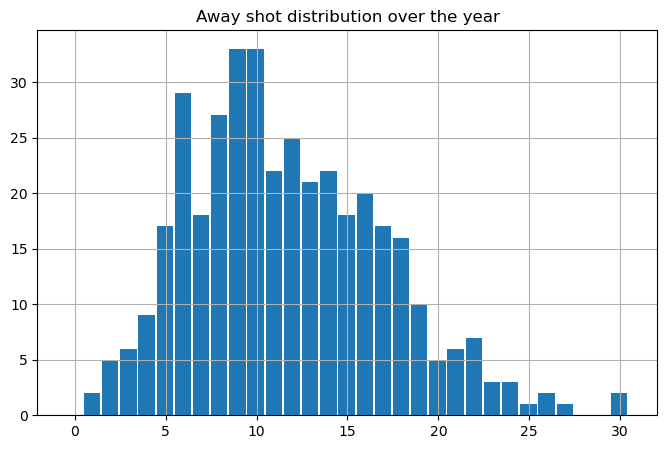

In [124]:
df_matches['AS'].hist(
    bins = list(range(0,32)), # bins from 0 to 31
    figsize = (8,5), width = 0.9, align = 'left'
)
plt.title('Away shot distribution over the year')
plt.show()

Does this make sense? Do we expect temas playing at home - on average- being more agressive than those playing away? Think and argue why this can or cannot be the right pattern.

<br>Let's compare home shots vs away shots distributions directly!

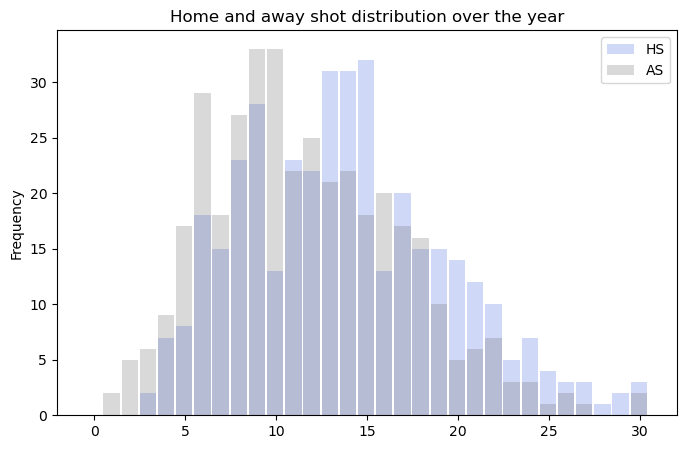

In [126]:
df_matches[['HS', 'AS']].plot(kind = 'hist',
    bins = [x for x in range(0,32)], # bins from 0 to 31
    figsize = (8,5),
    width = 0.9,
    align = 'left', 
    alpha = 0.25,
    color = ['royalblue', 'dimgray'],
    title = 'Home and away shot distribution over the year'
)
plt.show()

<br>Interesting fact: when plotting *home shots* on a team-by-team basis we can't see this unimodal, normal-like distribution. Why is that?

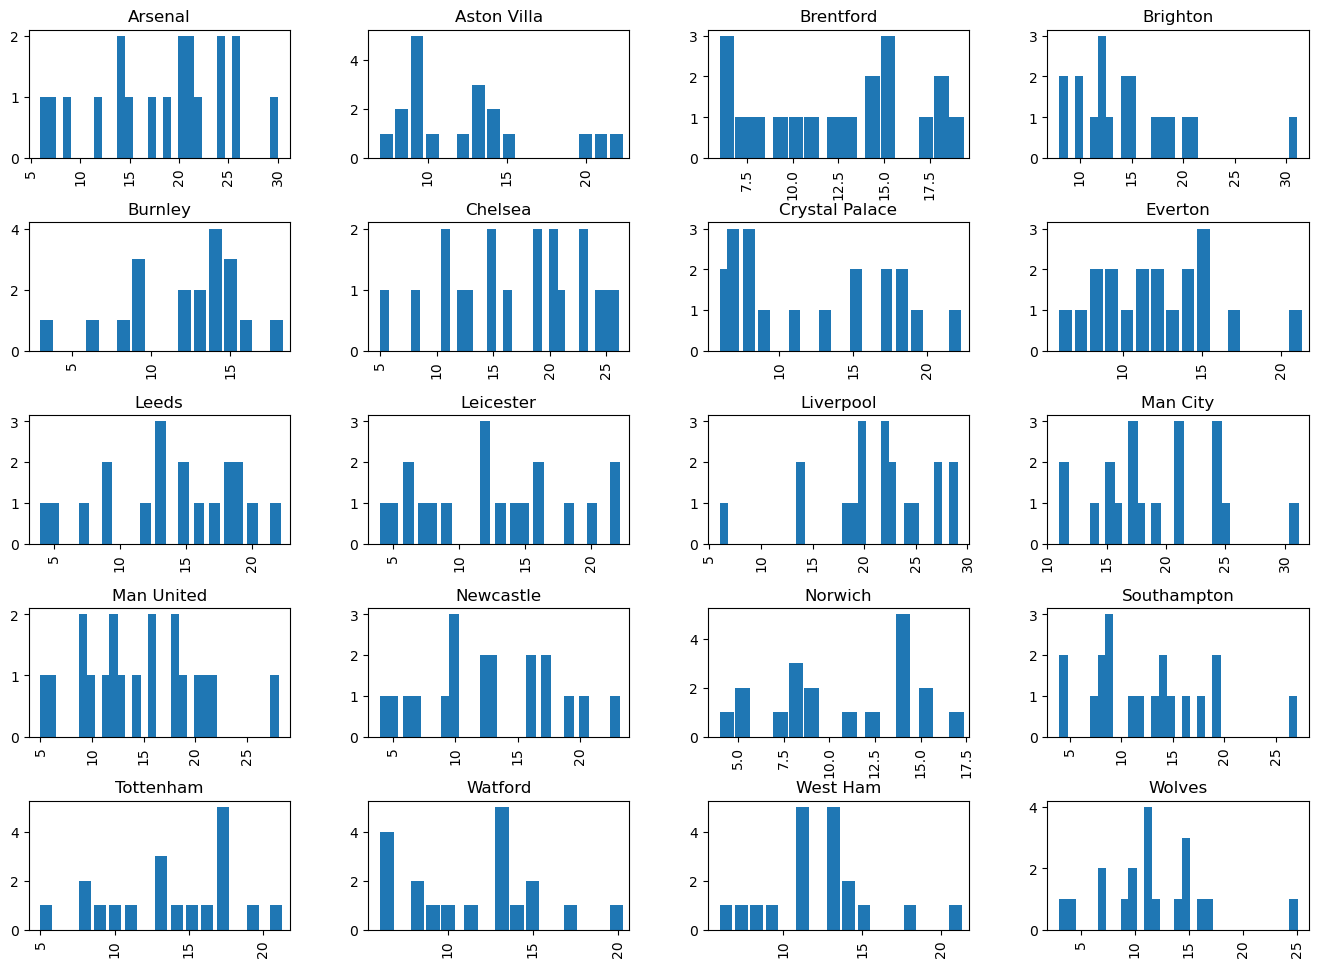

In [128]:
df_matches[['HomeTeam', 'HS']].hist(
    by = 'HomeTeam', 
    figsize = (16,12), bins = 31, width = 0.8)
plt.show()

<details><summary><b>Click here for the answer</b></summary>
    
<br>This is, eventually, the **[Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) in action!**

</details>

#### Formal Statistical Testing



Here we would like to formally test ***whether teams are equally agressive at home than away***. (We can test whether they are *more* agressive at home than away, but for now we are simply testing the equality.) 

We measure agressiveness by comparing the typical number of shots by the home teams against their _corresponding_ away teams. For this, we are using the so-called **[t_test](https://en.wikipedia.org/wiki/Student%27s_t-test)**. Since for each _home shot value_ there is a corresponding _away shot value_, we are using the [paired t-test](https://en.wikipedia.org/wiki/Student%27s_t-test#Dependent_t-test_for_paired_samples)

In statistical testing we are trying to find proof that our _null hypothesis_ ($H_0$) is ***not true***. For this, we split the event space into to subspaces, ($H_0$) and ($H_1$):   
<center>
    $H_0: \overline{X}_{homeshots} =  \overline{X}_{awayshots}$  <br> 
    $H_1: \overline{X}_{homeshots} \neq \overline{X}_{awayshots}$
</center><br>
 
 
This is a very important concept, atlhough at first blush it goesn against common sense. We formulate our assumption in a way that ***what we would like to reject goes into $H_0$, and what we would like to prove goes into $H_1$***. Rejecting $H_0$ means accepting $H_1$ (the alternative), while failing to reject $H_0$ simply means we have just not found sufficient evidence to do so. 

In case $H_0$ cannot be rejected, then the corresponding `t-test` produces a 'low' t-value. Here all we can say is that _we have **not found evidence** that the typical number of shots per game by the home team is higher than the away team_. This would mean that teams playing home do not prove more agressive than their counterparts. 

If we find evidence, that ($H_0$) is not true (so most likely the opposite $H_1$ is true), we will see a 'high' t-value (or _t-statistic_). In this case then we can say that _we have **found evidence** for home teams, **on average**, playing more agressively, than away teams_. 

The t-test formula is
<center>
  <font size = 4px>$t = \frac{\overline{X}_{homeshots} - \overline{X}_{awayshots}}{s_d  /\sqrt{n}}$</font>
</center>
<br>where $s_d$ is the standard deviation of the difference between home shots and away shots per match, and $n$ is the sample size (here 380 matches). 

OK, but what is _high_ t-value and what is _low_ t_value? This is what `p-value` is for. 

The _p-value_ is the likelihood of accepting $H_1$ when in fact $H_0$ is true. A <font color = 'blue'>low p_value indicates that the non-zero difference between the two population averages is not the result of some random extremity, but they are truly different</font>. If _p < 5%_, then $H_0$ is most likely false and can be rejected. 

For this, we use the `ttest_rel()` method of the [scipy package](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel). 

In [130]:
from scipy import stats

In [181]:
stats.ttest_rel(df_matches.HS, df_matches.AS)

TtestResult(statistic=4.288008983908477, pvalue=2.2901820411427433e-05, df=379)

For better output and presentation we can define a new variable as the result of the function, and call the `statistic` and the `pvalue` attributes of this new object. 

In [132]:
t_stat = stats.ttest_rel(df_matches.HS, df_matches.AS)

In [134]:
print('t-value: {:.3f}'.format(t_stat.statistic))

t-value: 4.288


p-value as _float_

In [136]:
print('p_value: {:.3f}'.format(t_stat.pvalue))

p_value: 0.000


p-value as _percent_

In [138]:
print('p_value: {:.1%}'.format(t_stat.pvalue))

p_value: 0.0%



<br>So are they really different? Do teams, _on average_, play more agressively at home or not? What do you think?

<br>**Some more shot stats**

Quantiles: deciles & quartiles.

Refresher: 
- '*deciles*' split the population into 10 equal-sized groups. 
    - The first decile (D1) is a number which is larger than 10 pct of the population and smaller than 90 percent of the population. This is *not the minimal* value but is a *relatively low value* within the population. 
    - D9 can be interpreted in the same fashion. 
- '*quartiles*' split the population into 4 equal-sized groups. 
    - The first quartile (Q1) is the value which is larger than 25 percent of the population. 
    - The *interquartile range* (the [Q1- Q3] interval is the mid 50 pct of the population. 
- The 5th decile (D5) or the second quartile (Q2) equals the *median* (Me) which splits the population into two equal-sized group. The median is one of the [*measures of central tendency*](https://www.abs.gov.au/websitedbs/D3310114.nsf/Home/Statistical+Language+-+measures+of+central+tendency).  

The `quantile()` method returns the value of a given quantile. For instance `quantile(0.1)` returns the *10th percentile*, or the *1st decile*. 

In [140]:
df_matches['HS'].quantile(0.1)

7.0

In [142]:
print('10 percent of matches had less than {} shots by the home team in the 2021-22 season.'.format(df_matches['HS'].quantile(0.1)))

10 percent of matches had less than 7.0 shots by the home team in the 2021-22 season.


<br>Preparing for the decile distribution table:

In [144]:
for i in range(1,10):
    print('D' + str(i))

D1
D2
D3
D4
D5
D6
D7
D8
D9


In [146]:
for i in range(1,10):
    print(i, df_matches['HS'].quantile(i/10))

1 7.0
2 9.0
3 10.700000000000003
4 12.0
5 13.5
6 15.0
7 16.30000000000001
8 19.0
9 21.100000000000023


In [148]:
for i in range(1,10):
    print(i, round(df_matches['HS'].quantile(i/10),1))

1 7.0
2 9.0
3 10.7
4 12.0
5 13.5
6 15.0
7 16.3
8 19.0
9 21.1


In [150]:
data = []
for i in range(1,10):
    l = ['D' + str(i), round(df_matches.HS.quantile(i/10),1), round(df_matches.AS.quantile(i/10),1)]
    data.append(l)

In [152]:
data

[['D1', 7.0, 5.0],
 ['D2', 9.0, 7.0],
 ['D3', 10.7, 9.0],
 ['D4', 12.0, 10.0],
 ['D5', 13.5, 11.0],
 ['D6', 15.0, 13.0],
 ['D7', 16.3, 14.0],
 ['D8', 19.0, 16.0],
 ['D9', 21.1, 19.0]]

In [154]:
df_deciles = pd.DataFrame(data = data, columns = ['decile', 'home shots', 'away shots'])

How can we interpret this table?

In [156]:
df_deciles

,decile,home shots,away shots
0,D1,7.0,5.0
1,D2,9.0,7.0
2,D3,10.7,9.0
3,D4,12.0,10.0
4,D5,13.5,11.0
5,D6,15.0,13.0
6,D7,16.3,14.0
7,D8,19.0,16.0
8,D9,21.1,19.0


What is the problem with the table above in terms of the visual represantation of the patterns in our data?

In [158]:
df_deciles.sort_values(by = 'decile', ascending = False)

,decile,home shots,away shots
8,D9,21.1,19.0
7,D8,19.0,16.0
6,D7,16.3,14.0
5,D6,15.0,13.0
4,D5,13.5,11.0
3,D4,12.0,10.0
2,D3,10.7,9.0
1,D2,9.0,7.0
0,D1,7.0,5.0


In [160]:
df_deciles.query("decile == 'D5'") # which value is this?

,decile,home shots,away shots
4,D5,13.5,11.0


A simple **bar chart**.

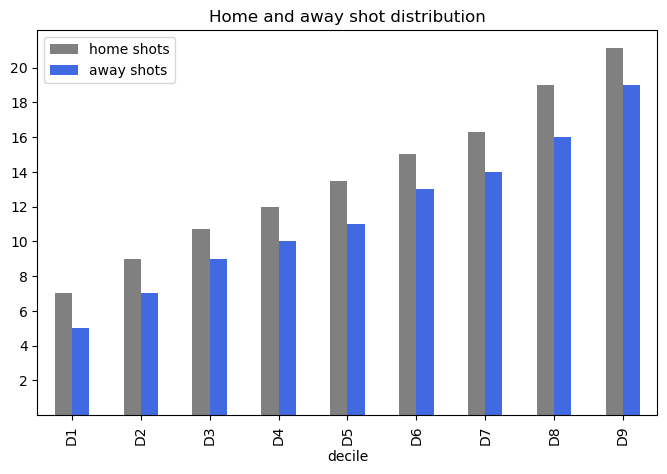

In [162]:
df_deciles.plot(
    kind = 'bar',
    x = 'decile', y = ['home shots', 'away shots'],
    figsize = (8,5), color = ['grey', 'royalblue'], 
    yticks = [x*2 for x in range(1,11)],               # check out how the list of y-axis ticks gets generated
    title = 'Home and away shot distribution'
)
plt.show()

*Note*: you can spend hours decorating your charts. To do that, use the [matplotlib color code guide](https://matplotlib.org/stable/gallery/color/named_colors.html). 

**Boxplot**.

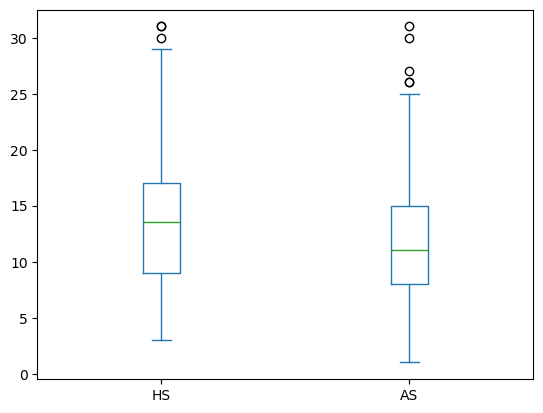

In [164]:
df_matches[['HS', 'AS']].plot(
    kind = 'box'
)
plt.show()

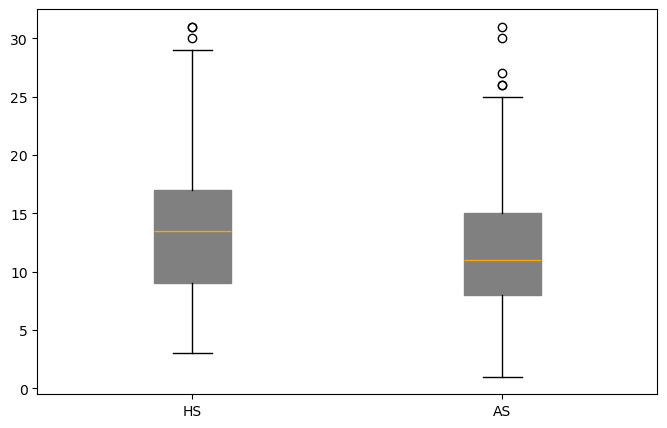

In [166]:
df_matches[['HS', 'AS']].plot(
    kind = 'box',
    figsize = (8,5), widths = [0.25, 0.25], 
    color = {'boxes': 'grey', 'medians': 'orange', 'whiskers': 'black', 'caps': 'black'}, patch_artist=True
)
plt.show()

For those of artistic talents: this is how [to decorate boxplots](https://matplotlib.org/stable/gallery/statistics/boxplot.html) and other plots. 

<br>***How good are the sport betting platforms in asessing match outcomes?***

In [168]:
df_matches.head(10)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,B365H,B365A,TG
0,2021-08-13,Brentford,Arsenal,2,0,8,22,4.00,1.95,2
1,2021-08-14,Man United,Leeds,5,1,16,10,1.53,5.75,6
2,2021-08-14,Burnley,Brighton,1,2,14,14,3.10,2.45,3
3,2021-08-14,Chelsea,Crystal Palace,3,0,13,4,1.25,13.00,3
4,2021-08-14,Everton,Southampton,3,1,14,6,1.90,4.00,4
5,2021-08-14,Leicester,Wolves,1,0,9,17,1.66,5.25,1
6,2021-08-14,Watford,Aston Villa,3,2,13,11,3.10,2.37,5
7,2021-08-14,Norwich,Liverpool,0,3,14,19,9.00,1.30,3
8,2021-08-15,Newcastle,West Ham,2,4,17,8,3.20,2.20,6
9,2021-08-15,Tottenham,Man City,1,0,13,18,5.50,1.60,1


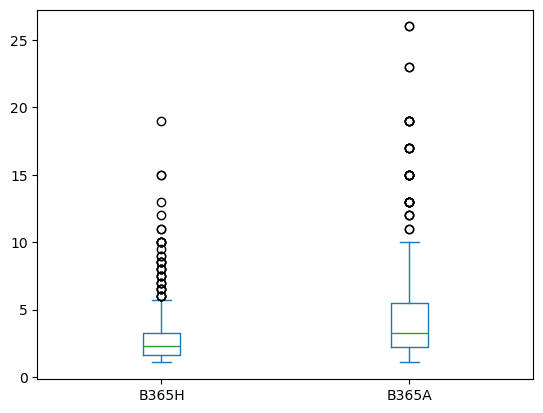

In [170]:
df_matches[['B365H', 'B365A']].plot(
    kind = 'box'
)
plt.show()

In [172]:
df_matches[['B365H', 'B365A']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
B365H,380.0,3.041026,2.380071,1.08,1.6100,2.275,3.3,19.0
B365A,380.0,4.690079,4.230893,1.14,2.2375,3.250,5.5,26.0


In [174]:
df_matches[df_matches.B365H == df_matches.B365H.max()]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,B365H,B365A,TG
181,2021-12-29,Brentford,Man City,0,1,6,12,19.0,1.14,1


In [176]:
df_matches[df_matches.B365A == df_matches.B365A.max()]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,B365H,B365A,TG
14,2021-08-21,Man City,Norwich,5,0,16,1,1.08,26.0,5
323,2022-04-23,Man City,Watford,5,1,21,5,1.10,26.0,6


Let's create three new variables:
- 'RESULT' as FTHG - FTAG
- 'SHOT_DIFF' as HS - AS
- 'ODDS_DIFF' as B365H - B365A

In [178]:
df_matches['RESULT'] = df_matches.FTHG - df_matches.FTAG # if positive, home team wins
df_matches['SHOT_DIFF'] = df_matches.HS - df_matches.AS # if positive, home team is more offensive
df_matches['ODDS_DIFF'] = df_matches.B365H - df_matches.B365A # if NEGATIVE, home team win pays less (home team has higher odds)

In [180]:
df_matches.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,B365H,B365A,TG,RESULT,SHOT_DIFF,ODDS_DIFF
0,2021-08-13,Brentford,Arsenal,2,0,8,22,4.00,1.95,2,2,-14,2.05
1,2021-08-14,Man United,Leeds,5,1,16,10,1.53,5.75,6,4,6,-4.22
2,2021-08-14,Burnley,Brighton,1,2,14,14,3.10,2.45,3,-1,0,0.65
3,2021-08-14,Chelsea,Crystal Palace,3,0,13,4,1.25,13.00,3,3,9,-11.75
4,2021-08-14,Everton,Southampton,3,1,14,6,1.90,4.00,4,2,8,-2.10


<br>Do betting sites get match outcomes right? Odds vs final result.

Note: See how $x$ and $y$ are used *both* as _variable names_ and _variable values_ in this short script! 

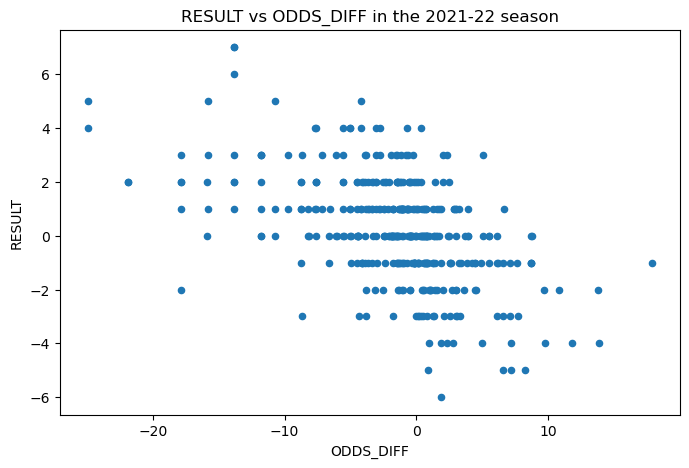

In [182]:
x = 'ODDS_DIFF' 
y = 'RESULT'

df_matches.plot(
    kind = 'scatter', 
    x = x, y = y,
    figsize = (8,5), 
    title = (f'{y} vs {x} in the 2021-22 season') # check out the f-strings!
)
plt.show()

Why does this graph look so unfortunate? This is because of differences in [cardinality](https://www.merriam-webster.com/dictionary/cardinality). 

Same chart for _difference in odds_ **vs** _difference between home shots and away shots_.

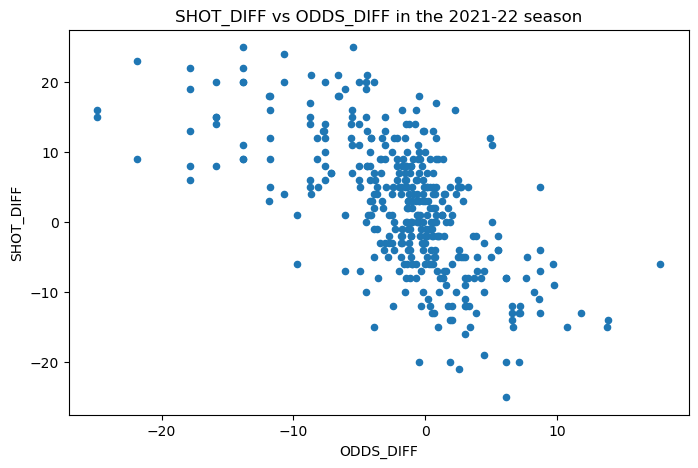

In [184]:
x = 'ODDS_DIFF' 
y = 'SHOT_DIFF'

df_matches.plot(
    kind = 'scatter', 
    x = x, y = y,
    figsize = (8,5), 
    title = (f'{y} vs {x} in the 2021-22 season')
)
plt.show()

<br>

### Enriching The Dataset With Financial Data

In [186]:
df_financials = pd.read_csv('https://raw.githubusercontent.com/eddwebster/football_analytics/master/data/capology/raw/premier-league/2021-2022/all_premier-league_2021-2022_last_updated_05092021.csv', index_col = 0)

***A reality check of what we have***

In [188]:
df_financials.head()

,Player,Weekly GrossBase Salary(IN GBP),Annual GrossBase Salary(IN GBP),Pos.,Age,Status,Expiration,Length,EstimatedGross Total(IN GBP),Team,League,Season
0,Thomas Partey,"£ 250,000","£ 13,000,000",DM,28,NaN,"Jun 30, 2025",4-yrs,"£ 60,777,184",Arsenal,Premier League,2021-2022
1,Pierre-Emerick Aubameyang,"£ 250,000","£ 13,000,000",CF,32,NaN,"Jun 30, 2023",2-yrs,"£ 30,388,592",Arsenal,Premier League,2021-2022
2,Alexandre Lacazette,"£ 182,115","£ 9,470,000",CF,30,NaN,"Jun 30, 2022",1-yr,"£ 11,068,460",Arsenal,Premier League,2021-2022
3,Héctor Bellerín,"£ 110,000","£ 5,720,000",RB,26,NaN,"Jun 30, 2023",2-yrs,"£ 13,370,980",Arsenal,Premier League,2021-2022
4,Nicolas Pépé,"£ 100,000","£ 5,200,000",RW,26,NaN,"Jun 30, 2024",3-yrs,"£ 18,233,155",Arsenal,Premier League,2021-2022


Rewriting column names where necessary.

In [190]:
df_financials.rename(
    columns = {
        'Weekly GrossBase Salary(IN GBP)' : 'Weekly_Gross',
        'Annual GrossBase Salary(IN GBP)' : 'Annual_Gross',
        'Pos.': 'Pos',
        'EstimatedGross Total(IN GBP)' : 'Estimated_Gross'
    }, 
    inplace = True
)

In [192]:
df_financials.head()

,Player,Weekly_Gross,Annual_Gross,Pos,Age,Status,Expiration,Length,Estimated_Gross,Team,League,Season
0,Thomas Partey,"£ 250,000","£ 13,000,000",DM,28,NaN,"Jun 30, 2025",4-yrs,"£ 60,777,184",Arsenal,Premier League,2021-2022
1,Pierre-Emerick Aubameyang,"£ 250,000","£ 13,000,000",CF,32,NaN,"Jun 30, 2023",2-yrs,"£ 30,388,592",Arsenal,Premier League,2021-2022
2,Alexandre Lacazette,"£ 182,115","£ 9,470,000",CF,30,NaN,"Jun 30, 2022",1-yr,"£ 11,068,460",Arsenal,Premier League,2021-2022
3,Héctor Bellerín,"£ 110,000","£ 5,720,000",RB,26,NaN,"Jun 30, 2023",2-yrs,"£ 13,370,980",Arsenal,Premier League,2021-2022
4,Nicolas Pépé,"£ 100,000","£ 5,200,000",RW,26,NaN,"Jun 30, 2024",3-yrs,"£ 18,233,155",Arsenal,Premier League,2021-2022


In [194]:
df_financials.shape

(542, 12)

In [196]:
df_financials.Season.unique() # Really 2021-22 only 

array(['2021-2022'], dtype=object)

In [198]:
df_financials.groupby('Team')['Player'].count()

Team
Arsenal              27
Aston Villa          22
Brentford            27
Brighton             31
Burnley              22
Chelsea              31
Crystal Palace       19
Everton              26
Leeds                24
Leicester            26
Liverpool            32
Manchester City      25
Manchester United    32
Newcastle            27
Norwich              31
Southampton          25
Tottenham            28
Watford              35
West Ham             25
Wolverhampton        27
Name: Player, dtype: int64

In [200]:
df_financials[df_financials.Team == 'Aston Villa']

,Player,Weekly_Gross,Annual_Gross,Pos,Age,Status,Expiration,Length,Estimated_Gross,Team,League,Season
0,Ollie Watkins,"£ 75,000","£ 3,900,000",CF,25,NaN,"Jun 30, 2025",4-yrs,"£ 18,233,155",Aston Villa,Premier League,2021-2022
1,Emiliano Buendía,"£ 75,000","£ 3,900,000",RW,24,NaN,"Jun 30, 2026",5-yrs,"£ 22,791,444",Aston Villa,Premier League,2021-2022
2,Tyrone Mings,"£ 65,000","£ 3,380,000",CB,28,NaN,"Jun 30, 2024",3-yrs,"£ 11,851,551",Aston Villa,Premier League,2021-2022
3,Matty Cash,"£ 65,000","£ 3,380,000",RB,23,NaN,"Jun 30, 2025",4-yrs,"£ 15,802,068",Aston Villa,Premier League,2021-2022
4,Bertrand Traoré,"£ 55,000","£ 2,860,000",RW,25,NaN,"Jun 30, 2024",3-yrs,"£ 10,028,235",Aston Villa,Premier League,2021-2022
5,Trezeguet,"£ 52,500","£ 2,730,000",LW,26,NaN,"Jun 30, 2023",2-yrs,"£ 6,381,604",Aston Villa,Premier League,2021-2022
6,Ashley Young,"£ 49,423","£ 2,570,000",LM,36,NaN,"Jun 30, 2022",1-yr,"£ 3,003,795",Aston Villa,Premier League,2021-2022
7,Morgan Sanson,"£ 48,077","£ 2,500,000",CM,26,NaN,"Jun 30, 2025",4-yrs,"£ 11,687,920",Aston Villa,Premier League,2021-2022
8,Emiliano Martínez,"£ 47,500","£ 2,470,000",GK,28,NaN,"Jun 30, 2024",3-yrs,"£ 8,660,749",Aston Villa,Premier League,2021-2022
9,Frédéric Guilbert,"£ 40,000","£ 2,080,000",RB,26,NaN,"Jun 30, 2023",2-yrs,"£ 4,862,175",Aston Villa,Premier League,2021-2022


Do we have the same teams in the two tables?

In [202]:
df_financials.Team.unique()

array(['Arsenal', 'Aston Villa', 'Brentford', 'Brighton', 'Burnley',
       'Chelsea', 'Crystal Palace', 'Everton', 'Leeds', 'Leicester',
       'Liverpool', 'Manchester City', 'Manchester United', 'Newcastle',
       'Norwich', 'Southampton', 'Tottenham', 'Watford', 'West Ham',
       'Wolverhampton'], dtype=object)

In [204]:
df_matches.HomeTeam.unique()

array(['Brentford', 'Man United', 'Burnley', 'Chelsea', 'Everton',
       'Leicester', 'Watford', 'Norwich', 'Newcastle', 'Tottenham',
       'Liverpool', 'Aston Villa', 'Crystal Palace', 'Leeds', 'Man City',
       'Brighton', 'Southampton', 'Wolves', 'Arsenal', 'West Ham'],
      dtype=object)

Remember: for comparison on memberships, we can use Python `set` variable type. It is a **collection** which is unordered, unchangeable, and unindexed. The most important aspect of sets that the *can't have two items of the same value*.

In [206]:
# What does the match stat table has which is not included in the financials table?
set(df_financials.Team) - set(df_matches.HomeTeam)

{'Manchester City', 'Manchester United', 'Wolverhampton'}

In [208]:
# And the other way around?
set(df_matches.HomeTeam) - set(df_financials.Team)

{'Man City', 'Man United', 'Wolves'}

Let's handle the issue by replacing the new versions with the old one by using the `replace()` method.

In [210]:
dc_replacements = {
    'Manchester City': 'Man City', 
    'Manchester United': 'Man United', 
    'Wolverhampton': 'Wolves'
}

In [212]:
df_financials['Team'].replace(dc_replacements, inplace = True)

In [214]:
set(df_financials.Team) - set(df_matches.HomeTeam)

set()

In [216]:
set(df_matches.HomeTeam) - set(df_financials.Team)

set()

In [218]:
df_financials.head()

,Player,Weekly_Gross,Annual_Gross,Pos,Age,Status,Expiration,Length,Estimated_Gross,Team,League,Season
0,Thomas Partey,"£ 250,000","£ 13,000,000",DM,28,NaN,"Jun 30, 2025",4-yrs,"£ 60,777,184",Arsenal,Premier League,2021-2022
1,Pierre-Emerick Aubameyang,"£ 250,000","£ 13,000,000",CF,32,NaN,"Jun 30, 2023",2-yrs,"£ 30,388,592",Arsenal,Premier League,2021-2022
2,Alexandre Lacazette,"£ 182,115","£ 9,470,000",CF,30,NaN,"Jun 30, 2022",1-yr,"£ 11,068,460",Arsenal,Premier League,2021-2022
3,Héctor Bellerín,"£ 110,000","£ 5,720,000",RB,26,NaN,"Jun 30, 2023",2-yrs,"£ 13,370,980",Arsenal,Premier League,2021-2022
4,Nicolas Pépé,"£ 100,000","£ 5,200,000",RW,26,NaN,"Jun 30, 2024",3-yrs,"£ 18,233,155",Arsenal,Premier League,2021-2022


<br>Converting '*Weekly_Gross*' into a number!

<br>Converting *Weekly_Gross* to an integer.

In [220]:
df_financials['Weekly_Gross'].iloc[0]

'£ 250,000'

In [222]:
df_financials['Weekly_Gross'].iloc[0].split(' ')

['£', '250,000']

In [224]:
df_financials['Weekly_Gross'].iloc[0].split(' ')[1]

'250,000'

In [226]:
df_financials['Weekly_Gross'].iloc[0].split(' ')[1].replace(',','')

'250000'

In [279]:
int(df_financials['Weekly_Gross'].iloc[0].split(' ')[1].replace(',',''))

250000

Now let's apply this step-by-step transformation to each element in the 'Length' column using `map` and `lambda functions`. 

In [281]:
df_financials['Weekly_Gross'] = df_financials['Weekly_Gross'].map(lambda x: int(x.split(' ')[1].replace(',','')))

In [283]:
df_financials.head()

,Player,Weekly_Gross,Annual_Gross,Pos,Age,Status,Expiration,Length,Estimated_Gross,Team,League,Season
0,Thomas Partey,250000,"£ 13,000,000",DM,28,NaN,"Jun 30, 2025",4-yrs,"£ 60,777,184",Arsenal,Premier League,2021-2022
1,Pierre-Emerick Aubameyang,250000,"£ 13,000,000",CF,32,NaN,"Jun 30, 2023",2-yrs,"£ 30,388,592",Arsenal,Premier League,2021-2022
2,Alexandre Lacazette,182115,"£ 9,470,000",CF,30,NaN,"Jun 30, 2022",1-yr,"£ 11,068,460",Arsenal,Premier League,2021-2022
3,Héctor Bellerín,110000,"£ 5,720,000",RB,26,NaN,"Jun 30, 2023",2-yrs,"£ 13,370,980",Arsenal,Premier League,2021-2022
4,Nicolas Pépé,100000,"£ 5,200,000",RW,26,NaN,"Jun 30, 2024",3-yrs,"£ 18,233,155",Arsenal,Premier League,2021-2022


In [285]:
df_financials.info()

<class 'pandas.core.frame.DataFrame'>
Index: 542 entries, 0 to 26
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           542 non-null    object 
 1   Weekly_Gross     542 non-null    int64  
 2   Annual_Gross     542 non-null    object 
 3   Pos              542 non-null    object 
 4   Age              542 non-null    int64  
 5   Status           0 non-null      float64
 6   Expiration       542 non-null    object 
 7   Length           542 non-null    object 
 8   Estimated_Gross  542 non-null    object 
 9   Team             542 non-null    object 
 10  League           542 non-null    object 
 11  Season           542 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 55.0+ KB


<br>
What is the order in terms of player remuneration?

In [287]:
# weekly average
df_financials.groupby('Team')['Weekly_Gross'].mean().sort_values(ascending = False)

Team
Man United        151760.812500
Chelsea           115508.677419
Man City          111221.560000
Liverpool          76706.718750
Arsenal            67836.148148
Tottenham          63479.357143
Everton            59187.884615
West Ham           46807.400000
Leicester          45938.615385
Crystal Palace     45544.526316
Aston Villa        37854.909091
Southampton        37163.080000
Newcastle          36849.037037
Wolves             33316.962963
Burnley            29541.090909
Brighton           28456.612903
Watford            20483.571429
Leeds              16075.291667
Norwich            13796.483871
Brentford           8598.259259
Name: Weekly_Gross, dtype: float64

In [289]:
# weekly sum; affected by player number in our data table!
df_financials.groupby('Team')['Weekly_Gross'].sum().sort_values(ascending = False)

Team
Man United        4856346
Chelsea           3580769
Man City          2780539
Liverpool         2454615
Arsenal           1831576
Tottenham         1777422
Everton           1538885
Leicester         1194404
West Ham          1170185
Newcastle          994924
Southampton        929077
Wolves             899558
Brighton           882155
Crystal Palace     865346
Aston Villa        832808
Watford            716925
Burnley            649904
Norwich            427691
Leeds              385807
Brentford          232153
Name: Weekly_Gross, dtype: int64

<br>

***Combining The Datasets: Merging/Joining***

In [291]:
df_matches.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,B365H,B365A,TG,RESULT,SHOT_DIFF,ODDS_DIFF
0,2021-08-13,Brentford,Arsenal,2,0,8,22,4.00,1.95,2,2,-14,2.05
1,2021-08-14,Man United,Leeds,5,1,16,10,1.53,5.75,6,4,6,-4.22
2,2021-08-14,Burnley,Brighton,1,2,14,14,3.10,2.45,3,-1,0,0.65
3,2021-08-14,Chelsea,Crystal Palace,3,0,13,4,1.25,13.00,3,3,9,-11.75
4,2021-08-14,Everton,Southampton,3,1,14,6,1.90,4.00,4,2,8,-2.10


In [293]:
df_financials.head()

,Player,Weekly_Gross,Annual_Gross,Pos,Age,Status,Expiration,Length,Estimated_Gross,Team,League,Season
0,Thomas Partey,250000,"£ 13,000,000",DM,28,NaN,"Jun 30, 2025",4-yrs,"£ 60,777,184",Arsenal,Premier League,2021-2022
1,Pierre-Emerick Aubameyang,250000,"£ 13,000,000",CF,32,NaN,"Jun 30, 2023",2-yrs,"£ 30,388,592",Arsenal,Premier League,2021-2022
2,Alexandre Lacazette,182115,"£ 9,470,000",CF,30,NaN,"Jun 30, 2022",1-yr,"£ 11,068,460",Arsenal,Premier League,2021-2022
3,Héctor Bellerín,110000,"£ 5,720,000",RB,26,NaN,"Jun 30, 2023",2-yrs,"£ 13,370,980",Arsenal,Premier League,2021-2022
4,Nicolas Pépé,100000,"£ 5,200,000",RW,26,NaN,"Jun 30, 2024",3-yrs,"£ 18,233,155",Arsenal,Premier League,2021-2022


In [295]:
df_team_values = pd.DataFrame(df_financials.groupby('Team')['Weekly_Gross'].mean())

In [297]:
df_team_values

,Weekly_Gross
Team,
Arsenal,67836.148148
Aston Villa,37854.909091
Brentford,8598.259259
Brighton,28456.612903
Burnley,29541.090909
Chelsea,115508.677419
Crystal Palace,45544.526316
Everton,59187.884615
Leeds,16075.291667


<br>

In SQL it would be:
```SQL
SELECT * 
FROM df_matches
LEFT JOIN df_team_values
ON df_matches.HomeTeam = df_team_values.index

```

<br>

In [299]:
df = pd.merge(df_matches, df_team_values, how = 'left', left_on = 'HomeTeam', right_index = True)

In [301]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,B365H,B365A,TG,RESULT,SHOT_DIFF,ODDS_DIFF,Weekly_Gross
0,2021-08-13,Brentford,Arsenal,2,0,8,22,4.00,1.95,2,2,-14,2.05,8598.259259
1,2021-08-14,Man United,Leeds,5,1,16,10,1.53,5.75,6,4,6,-4.22,151760.812500
2,2021-08-14,Burnley,Brighton,1,2,14,14,3.10,2.45,3,-1,0,0.65,29541.090909
3,2021-08-14,Chelsea,Crystal Palace,3,0,13,4,1.25,13.00,3,3,9,-11.75,115508.677419
4,2021-08-14,Everton,Southampton,3,1,14,6,1.90,4.00,4,2,8,-2.10,59187.884615


In [303]:
df.columns = [x for x in df.columns[:-1]] + ['HomeTeam_Weekly_Pay']

In [305]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,B365H,B365A,TG,RESULT,SHOT_DIFF,ODDS_DIFF,HomeTeam_Weekly_Pay
0,2021-08-13,Brentford,Arsenal,2,0,8,22,4.00,1.95,2,2,-14,2.05,8598.259259
1,2021-08-14,Man United,Leeds,5,1,16,10,1.53,5.75,6,4,6,-4.22,151760.812500
2,2021-08-14,Burnley,Brighton,1,2,14,14,3.10,2.45,3,-1,0,0.65,29541.090909
3,2021-08-14,Chelsea,Crystal Palace,3,0,13,4,1.25,13.00,3,3,9,-11.75,115508.677419
4,2021-08-14,Everton,Southampton,3,1,14,6,1.90,4.00,4,2,8,-2.10,59187.884615


In [307]:
df = pd.merge(df, df_team_values, how = 'left', left_on = 'AwayTeam', right_index = True)

In [309]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,B365H,B365A,TG,RESULT,SHOT_DIFF,ODDS_DIFF,HomeTeam_Weekly_Pay,Weekly_Gross
0,2021-08-13,Brentford,Arsenal,2,0,8,22,4.00,1.95,2,2,-14,2.05,8598.259259,67836.148148
1,2021-08-14,Man United,Leeds,5,1,16,10,1.53,5.75,6,4,6,-4.22,151760.812500,16075.291667
2,2021-08-14,Burnley,Brighton,1,2,14,14,3.10,2.45,3,-1,0,0.65,29541.090909,28456.612903
3,2021-08-14,Chelsea,Crystal Palace,3,0,13,4,1.25,13.00,3,3,9,-11.75,115508.677419,45544.526316
4,2021-08-14,Everton,Southampton,3,1,14,6,1.90,4.00,4,2,8,-2.10,59187.884615,37163.080000


In [311]:
# df.columns = [x for x in df.columns[:-1]] + ['AwayTeam_Weekly_Pay']
df.rename({'Weekly_Gross': 'AwayTeam_Weekly_Pay'}, axis = 'columns', inplace = True)

In [313]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,B365H,B365A,TG,RESULT,SHOT_DIFF,ODDS_DIFF,HomeTeam_Weekly_Pay,AwayTeam_Weekly_Pay
0,2021-08-13,Brentford,Arsenal,2,0,8,22,4.00,1.95,2,2,-14,2.05,8598.259259,67836.148148
1,2021-08-14,Man United,Leeds,5,1,16,10,1.53,5.75,6,4,6,-4.22,151760.812500,16075.291667
2,2021-08-14,Burnley,Brighton,1,2,14,14,3.10,2.45,3,-1,0,0.65,29541.090909,28456.612903
3,2021-08-14,Chelsea,Crystal Palace,3,0,13,4,1.25,13.00,3,3,9,-11.75,115508.677419,45544.526316
4,2021-08-14,Everton,Southampton,3,1,14,6,1.90,4.00,4,2,8,-2.10,59187.884615,37163.080000


In [315]:
df['HomeTeam_Excess_Weekly_Pay'] = df.HomeTeam_Weekly_Pay - df.AwayTeam_Weekly_Pay

In [317]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,B365H,B365A,TG,RESULT,SHOT_DIFF,ODDS_DIFF,HomeTeam_Weekly_Pay,AwayTeam_Weekly_Pay,HomeTeam_Excess_Weekly_Pay
0,2021-08-13,Brentford,Arsenal,2,0,8,22,4.00,1.95,2,2,-14,2.05,8598.259259,67836.148148,-59237.888889
1,2021-08-14,Man United,Leeds,5,1,16,10,1.53,5.75,6,4,6,-4.22,151760.812500,16075.291667,135685.520833
2,2021-08-14,Burnley,Brighton,1,2,14,14,3.10,2.45,3,-1,0,0.65,29541.090909,28456.612903,1084.478006
3,2021-08-14,Chelsea,Crystal Palace,3,0,13,4,1.25,13.00,3,3,9,-11.75,115508.677419,45544.526316,69964.151104
4,2021-08-14,Everton,Southampton,3,1,14,6,1.90,4.00,4,2,8,-2.10,59187.884615,37163.080000,22024.804615


<br>

#### Question: how important are the differences in player emunerations for betting sites to determine odds?

Do teams with higher average player salaries have lower betting payout ratios?

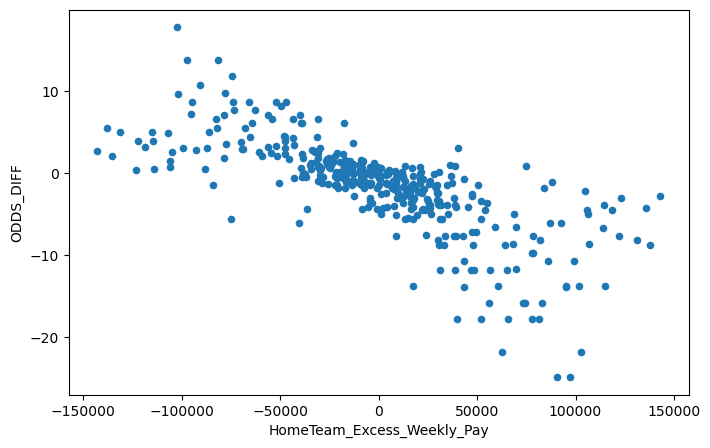

In [319]:
df.plot(
    kind = 'scatter', x = 'HomeTeam_Excess_Weekly_Pay', y = 'ODDS_DIFF',
    figsize = (8,5)
);

#### Plotting using `seaborn`

In [321]:
import seaborn as sns

A visual representation of a pattern of a *linear relationship* between x (excess pay for the home team) and y (the net odds in favov of the home team). We will call it a `linear regression` in DA2.

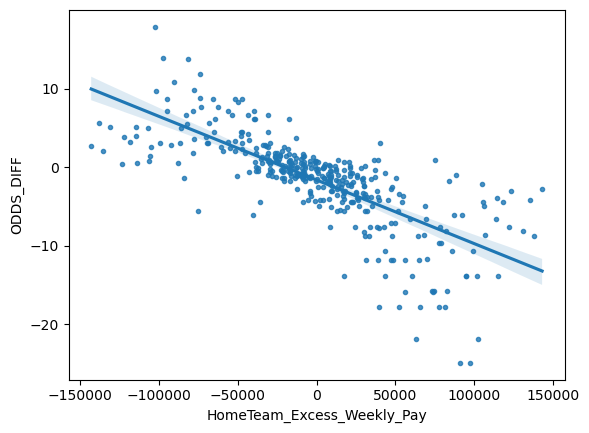

In [323]:
sns.regplot(
    data = df,
    x = 'HomeTeam_Excess_Weekly_Pay', y = 'ODDS_DIFF', 
    marker= '.',
    fit_reg= True);

With some additional customization.

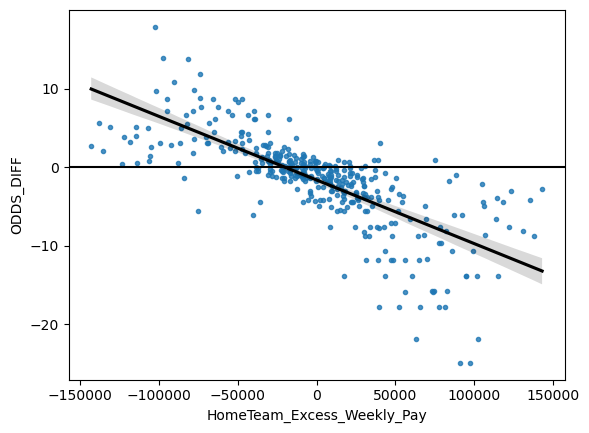

In [325]:
sns.regplot(
    data = df,
    x = 'HomeTeam_Excess_Weekly_Pay', y = 'ODDS_DIFF', 
    marker= '.',
    fit_reg= True, line_kws = {'color' : 'k'})
plt.axhline(y = 0, color = 'k');

Some inquiries into two extreme data points. 

In [327]:
df[df.HomeTeam_Excess_Weekly_Pay == df.HomeTeam_Excess_Weekly_Pay.max()]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,B365H,B365A,TG,RESULT,SHOT_DIFF,ODDS_DIFF,HomeTeam_Weekly_Pay,AwayTeam_Weekly_Pay,HomeTeam_Excess_Weekly_Pay
341,2022-05-02,Man United,Brentford,3,0,9,12,1.72,4.5,3,3,-3,-2.78,151760.8125,8598.259259,143162.553241


In [329]:
df[df.ODDS_DIFF == df.ODDS_DIFF.max()]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,B365H,B365A,TG,RESULT,SHOT_DIFF,ODDS_DIFF,HomeTeam_Weekly_Pay,AwayTeam_Weekly_Pay,HomeTeam_Excess_Weekly_Pay
181,2021-12-29,Brentford,Man City,0,1,6,12,19.0,1.14,1,-1,-6,17.86,8598.259259,111221.56,-102623.300741
